# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [17]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | LHR-LAX. I prefer the Boeing 7...
1,✅ Trip Verified | Flew back to UK from Miami ...
2,✅ Trip Verified | I flew with hand baggage bu...
3,"Not Verified | London to Cairo. First, on this..."
4,✅ Trip Verified | This review is specifically...


In [18]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning

The data we scraped is unstructured and messy, in this section we will clean and prepare it for analysis

In [22]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [9]:
#pop removes the 'reviews' column and return it as a seperate series
df = pd.read_csv("BA_reviews.csv")
df = df.pop('reviews')
df

0      ✅ Trip Verified | I strongly advise everyone t...
1      ✅ Trip Verified | My partner and I were on the...
2      Not Verified |  We had a Premium Economy retur...
3      ✅ Trip Verified |  I should like to review my ...
4      ✅ Trip Verified | We have flown with British A...
                             ...                        
995    ✅ Trip Verified |  This review is specifically...
996    ✅ Trip Verified |  London to Aberdeen. Before ...
997    ✅ Trip Verified |  Gatwick to Dubrovnik. Overc...
998    ✅ Trip Verified |  I paid an extra £500 for tw...
999    ✅ Trip Verified |  Faro to Heathrow. Flight wa...
Name: reviews, Length: 1000, dtype: object

In [23]:
df = df.str.replace('Trip Verified |', '')
df = df.str.replace('✅','')
df = df.str.replace('|', '')
df = df.str.replace(r'\b(\w{1,3})\b','') #regex
df = df.apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df

0        I strongly advise everyone to never fly Brit...
1        My partner and I were on the BA2166 return f...
2      Not Verified   We had a Premium Economy return...
3         I should like to review my flight with Brit...
4        We have flown with British Airways a few tim...
                             ...                        
995       This review is specifically aimed at the ex...
996       London to Aberdeen Before boarding the flig...
997       Gatwick to Dubrovnik Overcrowded lounges bu...
998       I paid an extra £500 for two Premium econom...
999       Faro to Heathrow Flight was very good no is...
Name: reviews, Length: 1000, dtype: object

In [26]:
#number of reviews
df.shape

(1000,)

In [30]:
all_reviews = " ".join(df).lower()

#only add word if length > 3 to avoid redundant words like i, am, the
filter_words = [x for x in all_reviews.split() if len(x) > 3]

#top 50 most common word
freq_words = pd.Series(filter_words).value_counts()[:50]
freq_words

flight      1927
with        1396
that        1244
they        1165
were        1089
this         901
have         870
from         752
service      727
very         586
time         528
london       507
there        470
seat         456
crew         449
class        437
food         433
british      432
which        428
good         426
when         426
airways      420
business     404
seats        399
their        397
staff        395
after        385
would        377
cabin        375
hours        355
only         346
been         329
them         329
back         309
heathrow     307
just         300
then         295
customer     286
airline      285
flights      281
even         281
could        270
told         270
airport      267
boarding     266
other        265
again        264
check        263
first        258
more         258
Name: count, dtype: int64

C:\Users\James\AppData\Local\Temp\ipykernel_16548\1100007611.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  freq_words.plot.barh(x = freq_words[0], y = freq_words[1])


<Axes: >

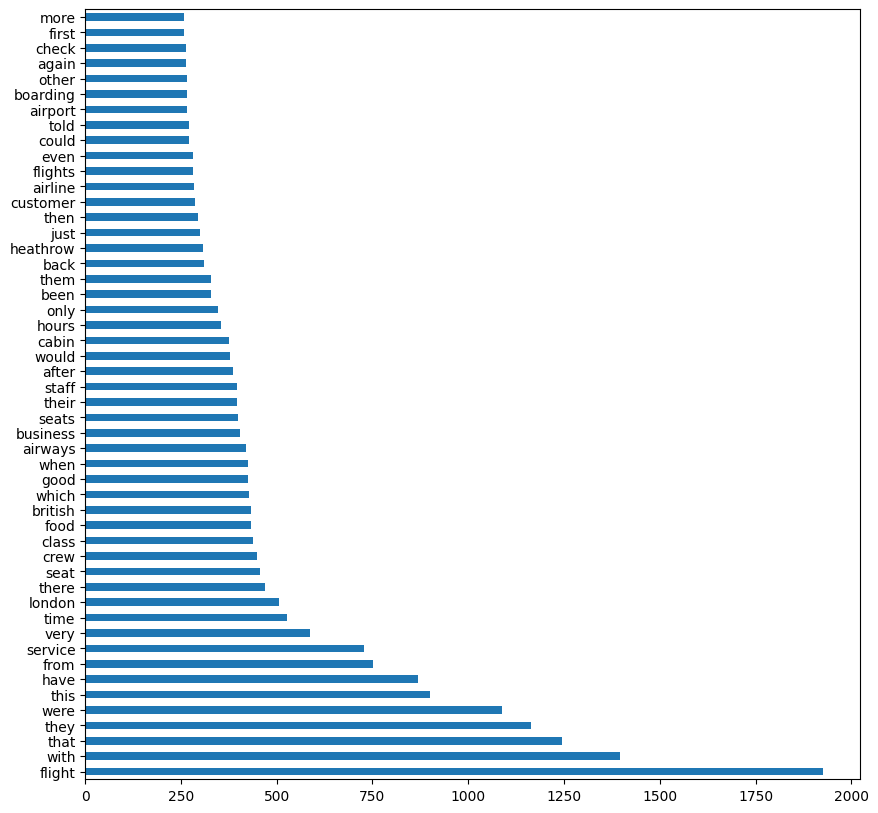

In [40]:
plt.figure(figsize=(10,10))

freq_words.plot.barh(x = freq_words[0], y = freq_words[1])


In [46]:
#Text clustering

categories = ['negative', 'positive']
num_cat = len(categories)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# text preprocessing and feature extraction on a collection of text documents
#Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

#Vectorize docs using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                              stop_words='english',
                              ngram_range=(1,1),
                              tokenizer=tokenizer.tokenize)

#Fit and Transform Text Data
reviews_count = tf_idf_vect.fit_transform(df)

reviews_count.shape




(1000, 7866)

In [47]:
#Kmeans model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= num_cat).fit(reviews_count)

#labels using kmeans
pred_labels = kmeans.labels_
pred_labels

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [48]:
cluster_center = kmeans.cluster_centers_
cluster_center 

array([[0.00023873, 0.00035389, 0.        , ..., 0.00015113, 0.        ,
        0.00015113],
       [0.00061598, 0.        , 0.00026679, ..., 0.        , 0.00021798,
        0.        ]])